### Read and set the data into list and dict, easier to manipulate

In [13]:
import pandas as pd
inputFileName = "Data_Knapsack.xlsx"
param_data = pd.read_excel(inputFileName, "Param", skiprows=0)
data = pd.read_excel(inputFileName, "Instance", skiprows=0)

nbItems = 10  #10000

items = data['Item']
weights = data['Weight']
values = data['Value']
totalWeight = sum(weights[iItem] for iItem in range(nbItems))

capacity = int(0.2 * totalWeight)


### Naive recursive solution

In [14]:
def recursiveKnapsack(capacity, weights, values, nbItems):
        
    #Base case 
    if nbItems==0 or capacity<=0:
        return 0
    
    #if capacity is lesser than the weight of the last item, then this item cannot be included in the optimal solution
    if (weights[nbItems-1] > capacity):
        return recursiveKnapsack(capacity, weights, values, nbItems-1)
    
    else :
        return max(values[nbItems-1] + recursiveKnapsack(capacity-weights[nbItems-1], weights, values, nbItems-1), \
                   recursiveKnapsack(capacity, weights, values, nbItems-1))



print("With recursiveKnapsack, result =", recursiveKnapsack(capacity, weights, values, nbItems))

With recursiveKnapsack, result = 287


n=20 With recursiveKnapsack, result = 1277
n=30 With recursiveKnapsack, result = 1885
n=40 

### Dynamic programming

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  4.  4.  8.  8.  8. 12. 12.]
 [ 0.  0.  3.  3.  6.  6.  9.  9. 12. 12. 15.]
 [ 0.  0.  0.  0.  7.  7.  7.  7. 14. 14. 14.]
 [ 0.  0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
With DynProgramming, result = (0.0, array([], dtype=float64), 0.0)


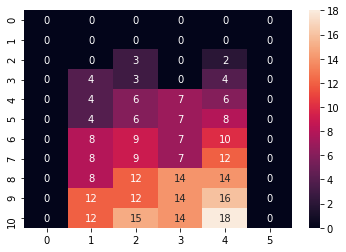

In [55]:
import numpy as np
import seaborn as sns; 

#WARNING : weights and capacity shall be integer

def knapsack_byDynProg(capacity, weights, values, nbItems):
    V = np.zeros(shape=(nbItems+1, capacity+1))
    trackSolution = np.zeros(shape=(nbItems+1, capacity+1))
    elements = []  #the list of the items that are part of the optimal solution
    carriedWeight = 0.0 #the sum of the weights of the items that are part of the optimal solution

    
    for iItem in range(1, nbItems+1):
        for iWeight in range(1, capacity+1):
            if iItem-1==0 or iWeight==1:
                V[iItem-1,iWeight]=0
            elif weights[iItem-1]<= iWeight:
                V[iItem-1,iWeight] = max(V[iItem-1,iWeight],values[iItem-1]+V[iItem-1,iWeight-weights[iItem-1]])
                #if V[iItem-1,iWeight]<=values[iItem-1]+V[iItem-1,iWeight-weights[iItem-1] :
                    #trackSolution[iItem,iWeight] = 1
            else:
                V[iItem,iWeight] = V[iItem-1,iWeight]
                
    
    currentWeight = capacity
    #TBC : compute elements and carriedWeight
            
    #Plot V as a heatmap
    ax = sns.heatmap(V.transpose(), annot=True, fmt='.0f')
    
    print(V)
    
    return V[nbItems, capacity], np.sort(elements), carriedWeight
    
nbItems = 5

weights = [4, 3, 2, 4, 1]

values = [5, 4, 3, 7, 2]

capacity = 10

print("With DynProgramming, result =", knapsack_byDynProg(capacity, weights, values, nbItems))
